In [91]:
#Import dependencies 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy import signal
from scipy.signal import savgol_filter
from scipy.stats import zscore
import sklearn # library for various machine learning and data scaling/normalization tools
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [39]:
pop_path = "Resources/pop.csv"
pe_mo_path = "Resources/PE_MO.csv"

population = pd.read_csv(pop_path, encoding = "utf-8", header=0)

pe_mo = pd.read_csv(pe_mo_path, encoding = "utf-8")

In [92]:
population.head(12)

,Age,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
0,<10,29785.000,31001.00,32123.000,32971.000,34089.000,35315.000,36656.000,37118.000,37828.000,...,48301.000,48493.000,48672.000,48840.000,48995.000,49140.000,49274.000,49400.000,49520.00,49635.000
1,10-19,21888.000,22057.00,22498.000,23355.000,24085.000,24677.000,25258.000,26843.000,28047.000,...,47531.000,47749.000,47975.000,48206.000,48442.000,48678.000,48914.000,49145.000,49370.00,49587.000
2,20-29,24042.000,23847.00,23537.000,23194.000,22815.000,22548.000,22338.000,22143.000,22028.000,...,50051.000,50148.000,50252.000,50366.000,50492.000,50632.000,50787.000,50960.000,51149.00,51354.000
3,30-39,23021.000,23357.00,23687.000,23872.000,24098.000,24304.000,24462.000,24572.000,24618.000,...,51922.000,52193.000,52437.000,52656.000,52851.000,53025.000,53179.000,53314.000,53434.00,53545.000
4,40-49,19432.000,19764.00,20155.000,20517.000,20871.000,21215.000,21518.000,21821.000,22103.000,...,49005.000,49372.000,49737.000,50086.000,50455.000,50822.000,51162.000,51527.000,52020.00,52515.000
5,50-59,15604.000,15813.00,15948.000,16093.000,16287.000,16512.000,16776.000,17073.000,17406.000,...,47827.000,47658.000,47604.000,47629.000,47718.000,47895.000,48128.000,48347.000,48435.00,48453.000
6,60-69,11152.000,11425.00,11713.000,12003.000,12270.000,12515.000,12743.000,12949.000,13101.000,...,43209.000,43825.000,44348.000,44878.000,45212.000,45494.000,45759.000,45943.000,46029.00,46011.000
7,70-79,5599.000,5797.00,6004.000,6215.000,6456.000,6696.000,6919.000,7146.000,7367.000,...,32809.000,33188.000,33700.000,34205.000,34756.000,35369.000,35895.000,36469.000,37089.00,37698.000
8,>= 80,1749.000,1817.00,1888.000,1965.000,2054.000,2148.000,2234.000,2317.000,2383.000,...,31141.000,31173.000,31086.000,30970.000,30952.000,30869.000,30891.000,30963.000,31114.00,31472.000
9,Total Population,152271.000,154878.00,157553.000,160184.000,163026.000,165931.000,168903.000,171984.000,174882.000,...,401796.000,403798.000,405811.000,407835.000,409873.000,411923.000,413989.000,416068.000,418161.00,420268.000


In [41]:
pe_mo.head()

,Unnamed: 0,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
0,P/E,7.00,9.60,10.90,9.90,12.6,12.5,13.60,12.00,18.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M/O,1.74,1.73,1.72,1.71,1.7,1.7,1.69,1.69,1.69,...,1.13,1.13,1.12,1.12,1.12,1.12,1.12,1.12,1.13,1.14


# Explore Population Data with Column & Stacked Bar Charts

In [42]:
# Extract the US Population for calendar year 2018

pop_1950 = population.loc[0:8, '1950']
pop_1980 = population.loc[0:8, '1980']
pop_2010 = population.loc[0:8, '2010']

# Extract the Age Bracket labels

age_groups = population.loc[0:8,'Age']

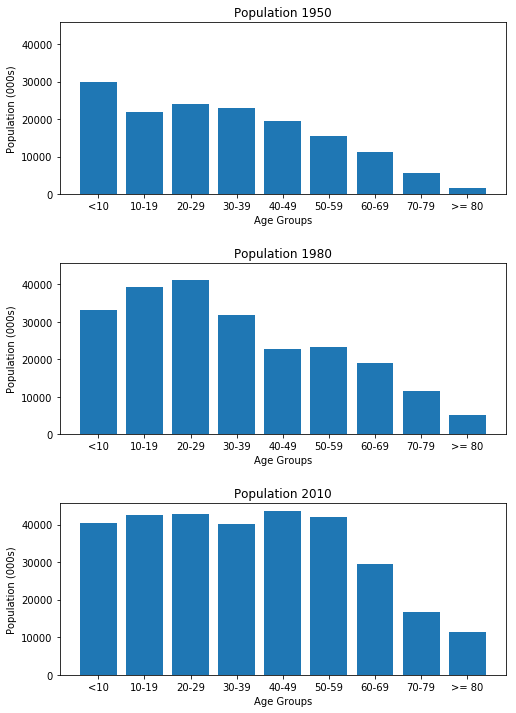

<Figure size 432x288 with 0 Axes>

In [84]:
# Create bar charts for calendar years 1950, 1980 and 2010 simply to provide info on the population distribution
plt.figure(figsize=(8,12))
plt.subplots_adjust(hspace=.4)

# create the 1950 bar chart
plt.subplot(3,1,1)
ax_1950 = plt.bar(age_groups,pop_1950)
plt.ylim(0.0, 45721.2)
plt.title('Population 1950')
plt.xlabel('Age Groups')
plt.ylabel('Population (000s)')

# create the 1980 bar chart
plt.subplot(3,1,2)
ax_1980 = plt.bar(age_groups,pop_1980)
plt.ylim(0.0, 45721.2)
plt.title('Population 1980')
plt.xlabel('Age Groups')
plt.ylabel('Population (000s)')

# create the 2010 bar chart
plt.subplot(3,1,3)
ax_2010 = plt.bar(age_groups,pop_2010)
plt.title('Population 2010')
plt.ylabel('Population (000s)')
plt.xlabel('Age Groups')

plt.show()
plt.savefig('1950_Population.png')
plt.savefig('1980_Population.png')
plt.savefig('2010_Population.png')

# Baby-boomers born between 1946 - 1964.
    # While the population as a whole is growing (same y-axis), you can see the 'wave' of the boomer generation aging across
    # these charts.   

In [44]:
# Create a dataframe with every 10th year (i.e. 1950, 1960, 1970,  etc) --> data cleaning to facilite ease of reading chart
pop_10th = population[population.columns[1::10]]
pop_10th.head()

,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040,2050,2060
0,29785.0,39151.0,37086.0,33054.0,36933.0,39642.0,40521.0,43115.0,44703.0,45891.0,48098.0,49635.0
1,21888.0,30368.0,40186.0,39347.0,34984.0,40933.0,42664.0,41422.0,44310.0,46067.0,47324.0,49587.0
2,24042.0,22070.0,30938.0,41072.0,40427.0,38397.0,42849.0,45016.0,44653.0,48013.0,49955.0,51354.0
3,23021.0,24525.0,22742.0,31819.0,41929.0,43175.0,40150.0,44774.0,47762.0,47927.0,51462.0,53545.0
4,19432.0,22593.0,24146.0,22777.0,31622.0,42738.0,43544.0,40369.0,45338.0,48596.0,48917.0,52515.0


In [45]:
# Calculate the percent of population < 40 for each 10th year (i.e. 1950, 1960, 1970, etc)

percent_U40 = []
percent_40_60 = []
percent_over_60 = []

for col in range(0,len(pop_10th.columns)): # for each year column
    pop_U40 = 0  # reset the U40 population to zero for each new year
    for row in range(4): # for each row with population under 40
        pop_U40 = pop_10th.iloc[row, col] + pop_U40
        tot_pop = pop_10th.iloc[9, col]
        pcnt_U40 = pop_U40/tot_pop * 100
    percent_U40.append(pcnt_U40)

# Calculate the percent of population between 40-60 for each year

for col in range(0,len(pop_10th.columns)): # for each year column
    pop_40_60 = 0  # reset the 40-60 population group to zero for each new year
    for row in range(4,6): # for each row with population between 40-60
        pop_40_60 = pop_10th.iloc[row, col] + pop_40_60
        tot_pop = pop_10th.iloc[9, col]
        pcnt_40_60 = pop_40_60/tot_pop * 100
    percent_40_60.append(pcnt_40_60)

# Calculate the percent of population > 60 for each year

for col in range(0,len(pop_10th.columns)): # for each year column
    pop_over_60 = 0  # reset the 40-60 population group to zero for each new year
    for row in range(6,9): # for each row with population between 40-60
        pop_over_60 = pop_10th.iloc[row, col] + pop_over_60
        tot_pop = pop_10th.iloc[9, col]
        pcnt_over_60 = pop_over_60/tot_pop * 100
    percent_over_60.append(pcnt_over_60)

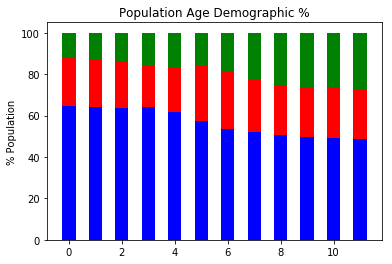

<Figure size 432x288 with 0 Axes>

In [83]:
# Create bar chart (same as above chart, just for every 10th year)

bar_U40 = [i for i in range(len(percent_U40))] # for X-axis, but really want to add Year labels
bottom_over_60 = [i+j for i,j in zip(percent_U40, percent_40_60)] # add the values of percent_U40 and percent_40_60 to create
    # the starting value to which we will add the percent_over_60

plt.bar(bar_U40, percent_U40, width=.5, color='b')
plt.bar(bar_U40, percent_40_60, bottom=percent_U40, width=.5, color='r')
plt.bar(bar_U40, percent_over_60, bottom=bottom_over_60, width=.5, color='g')
plt.ylabel('% Population')
plt.title('Population Age Demographic %')
plt.show()
plt.savefig('Age_Demographic.png')

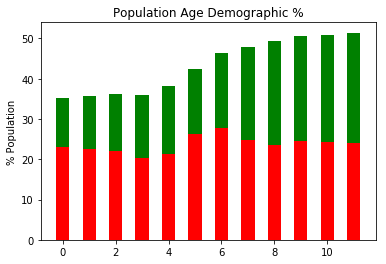

<Figure size 432x288 with 0 Axes>

In [82]:
# Create bar chart with just 2 age demographics (40-60 and 60+)

plt.bar(bar_U40, percent_40_60, width=.5, color='r')
plt.bar(bar_U40, percent_over_60, bottom=percent_40_60, width=.5, color='g')
plt.ylabel('% Population')
plt.title('Population Age Demographic %')
plt.show()
plt.savefig('MO_Age_Demographic.png')

# Evaluate the Statistical Correlation Between M/O and PE Ratio for S&P 500

In [48]:
pe_mo.head()

,Unnamed: 0,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
0,P/E,7.00,9.60,10.90,9.90,12.6,12.5,13.60,12.00,18.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M/O,1.74,1.73,1.72,1.71,1.7,1.7,1.69,1.69,1.69,...,1.13,1.13,1.12,1.12,1.12,1.12,1.12,1.12,1.13,1.14


In [49]:
pe_mo.index=pe_mo.iloc[:,0] # establish the 'Unnamed: 0' column as the index
pe_mo=pe_mo.iloc[:,1:] # remove the, now duplicate column with P/E, M/O, M/Y strings
pe_mo.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
P/E,7.00,9.60,10.90,9.90,12.6,12.5,13.60,12.00,18.50,17.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M/O,1.74,1.73,1.72,1.71,1.7,1.7,1.69,1.69,1.69,1.69,...,1.13,1.13,1.12,1.12,1.12,1.12,1.12,1.12,1.13,1.14


# Create and Insert the Chart of M/O vs P/E Ratio for S&P 500 
    # (1950 through 2017)

# Analyze the Data Sets

In [50]:
pe_mo = pe_mo.T # transpose the dataframe...columnar data will be used for correlation analysis
pe_mo.head()

Unnamed: 0,P/E,M/O
1950,7.0,1.74
1951,9.6,1.73
1952,10.9,1.72
1953,9.9,1.71
1954,12.6,1.70


In [51]:
# Drop rows with empty data (i.e. the rows from 2018 through 2060 which do not have P/E data)
pe_mo_historical = pe_mo.dropna()
pe_mo_historical.tail()

Unnamed: 0,P/E,M/O
2013,18.0,1.29
2014,20.1,1.22
2015,23.7,1.16
2016,23.8,1.12
2017,24.2,1.10


In [52]:
# Extract the individual data series to faciliate individual plotting

pe = pe_mo_historical['P/E']
mo = pe_mo_historical['M/O']


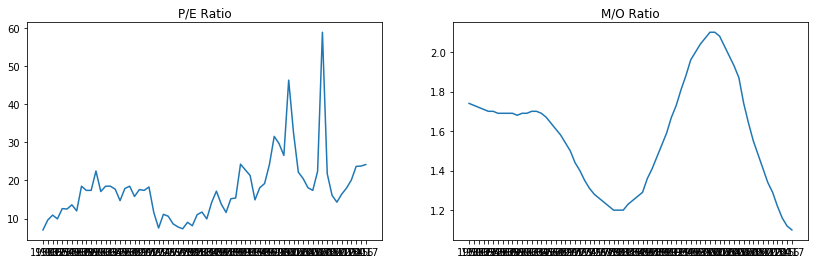

In [81]:
# Create line plots for individual data series

plt.figure(figsize=(14,4))
plt.subplots_adjust(wspace=.2)

# Plot P/E Ratio 
plt.subplot(1,2,1)
plt.plot(pe)
plt.title('P/E Ratio')
plt.savefig('PE_Ratio.png')
# Plot M/O Ratio
plt.subplot(1,2,2)
plt.plot(mo)
plt.title('M/O Ratio')
plt.savefig('MO_Ratio.png')
plt.show()


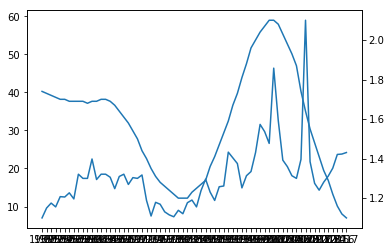

In [94]:
pe_mo_years = pe_mo_historical.reset_index()
#pe_mo_years
fig, ax1= plt.subplots()
ax1.plot(pe_mo_years['index'], pe_mo_years['P/E'])
ax2 = ax1.twinx()
ax2.plot(pe_mo_years['index'], pe_mo_years['M/O'])
plt.show()

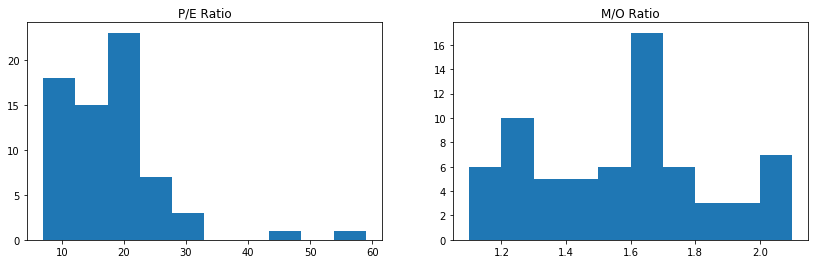

In [85]:
# Create histogram plots for individual data series

plt.figure(figsize=(14,4))
plt.subplots_adjust(wspace=.2)

# Plot P/E Ratio 
plt.subplot(1,2,1)
plt.hist(pe)
plt.title('P/E Ratio')
plt.savefig('PE_hist.png')
# Plot M/O Ratio
plt.subplot(1,2,2)
plt.hist(mo)
plt.title('M/O Ratio')
plt.savefig('MO_hist')
plt.show()

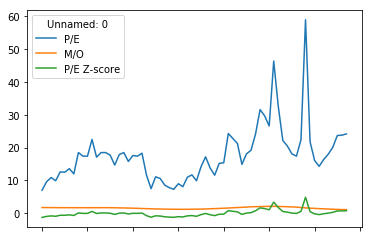

In [75]:
pe_mo_historical.plot()

# Interpretation of the above data
    # Unsurprisingly, these data sets are not normally distributed.  That's ok!
    # However,  the P/E Ratio does have 'outliers' driven by macro events (e.g. Internet bubble, 2008 housing crash) that we 
        # will remove to facilitate model predictive capabilities
    # Outliers are also visible in the scatter plot below

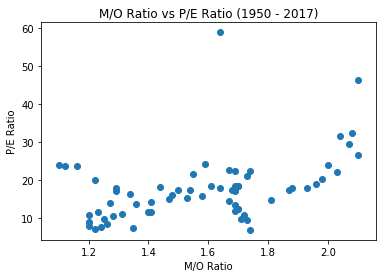

In [86]:
# Create scatter plot for M/O vs P/E
# Scatter Plot for M/O vs P/E Ratio 

plt.scatter(pe_mo_historical['M/O'],pe_mo_historical['P/E'])
plt.xlabel('M/O Ratio')
plt.ylabel('P/E Ratio')
plt.title('M/O Ratio vs P/E Ratio (1950 - 2017)')
plt.savefig('mo_vs_pe_scatter.png')
plt.show()

# Null Hypothesis - there is no correlation between M/O and P/E
    # No correlation between the age of the US population and US stock prices

# Analyze the correlation (Pearson coefficient) between M/O and PE

In [56]:
# Perform the Pearson Correlation (default correlation method for Pandas) --> outputs the r-value (correlation coefficient) and 
    # indicates a 'moderate correlation' in this case (i.e. 1 or -1 is perfect  correlation and 0 is no correlation)

print(f'Pearson r-value is: {pe.corr(mo)}')


Pearson r-value is: 0.44205229691175013


In [57]:
# Perform the Pearson Correlation using the scipy.stats module because this provides both r and p values
    # However, in order to use this module, need to drop the rows with missing data.

output = list(stats.pearsonr(pe_mo_historical['P/E'],pe_mo_historical['M/O']))

print(f'Pearson r-value is: {output[0]:.2f}')
print(f'Pearson p-value is: {output[1]:.4f}')

Pearson r-value is: 0.44
Pearson p-value is: 0.0002


# Interpretation of this Pearson Correlation is:
    # Moderate correlation based on r-value of .44
    # Reject the null hypothesis and conclude that the correlation between M/O and P/E is statistically significant based
        #on p-value
    # Note:  The above analysis conclusions are before any removal of outliers.  We would expect that removal of the outliers
        # (Internet bubble, and housing crash) from the data will improve the correlation and, subsequent, model accuracy.

# Remove the outliers from the data (e.g. P/E ratio with z-score >= 3)

In [58]:
# Extract the P/E column from pe_mo_historical as a numpy array, which is the format needed for input to calculate z-score

pe_array = np.array(pe_mo_historical['P/E'].values.tolist())

In [59]:
# Calculate z-score for PE data to identify outliers which will be dropped from data and smooth the PE curve
pe_zscore = stats.zscore(pe_array)

In [60]:
# Add the pe-zscore to a new column in pe_mo_historical dataframe

pe_mo_historical['P/E Z-score'] = pe_zscore

pe_mo_historical.head()

Unnamed: 0,P/E,M/O,P/E Z-score
1950,7.0,1.74,-1.273763
1951,9.6,1.73,-0.965775
1952,10.9,1.72,-0.811780
1953,9.9,1.71,-0.930237
1954,12.6,1.70,-0.610403


In [61]:
pe_mo_historical.describe()

Unnamed: 0,P/E,M/O,P/E Z-score
count,68.000000,68.000000,6.800000e+01
mean,17.752941,1.581618,-1.175530e-16
std,8.504634,0.275197,1.007435e+00
min,7.000000,1.100000,-1.273763e+00
25%,11.925000,1.332500,-6.903615e-01
50%,17.400000,1.640000,-4.180842e-02
75%,20.700000,1.722500,3.491003e-01
max,59.000000,2.100000,4.886011e+00


In [62]:
# Remove the rows with a P/E Zscore > 3 or < -3

pe_mo_historical_no_outliers = pe_mo_historical[(pe_mo_historical['P/E Z-score'] < 3) & (pe_mo_historical['P/E Z-score'] > -3)]
pe_mo_historical_no_outliers.head()

Unnamed: 0,P/E,M/O,P/E Z-score
1950,7.0,1.74,-1.273763
1951,9.6,1.73,-0.965775
1952,10.9,1.72,-0.811780
1953,9.9,1.71,-0.930237
1954,12.6,1.70,-0.610403


In [63]:
# Notice that there are now 2 fewer data points after removing those with Z-scores > +/- 3
pe_mo_historical_no_outliers.describe()

Unnamed: 0,P/E,M/O,P/E Z-score
count,66.000000,66.000000,66.000000
mean,16.693939,1.572879,-0.125446
std,5.883533,0.271660,0.696947
min,7.000000,1.100000,-1.273763
25%,11.775000,1.317500,-0.708130
50%,17.300000,1.625000,-0.053654
75%,19.875000,1.717500,0.251373
max,32.600000,2.100000,1.758741


# Note:  Removed P/E ratios that were more than 3 standard deviations from the mean of the data (i.e. ~ 99.7% of data is within 3 standard deviations)

In [64]:
# Extract the new pe without the outliers data series to faciliate individual plotting

pe_no_outliers = pe_mo_historical_no_outliers['P/E']
mo_no_outliers = pe_mo_historical_no_outliers['M/O']

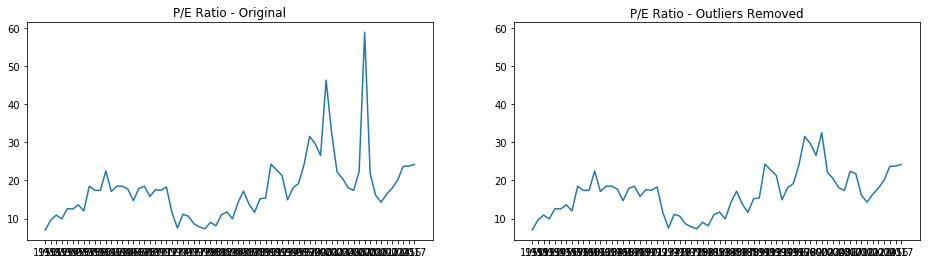

In [87]:
# Create line plots to compare the original P/E data to the new P/E data without the outliers...hold y-axis limits constant

plt.figure(figsize=(16,4))
plt.subplots_adjust(wspace=.2)

# Plot Original P/E Ratio 
plt.subplot(1,2,1)
plt.plot(pe)
plt.title('P/E Ratio - Original')
plt.savefig('pe_original_line.png')
# Plot Smoothed P/E Ratio 
plt.subplot(1,2,2)
plt.plot(pe_no_outliers)
plt.ylim(4.4, 61.6)
plt.title('P/E Ratio - Outliers Removed')
plt.savefig('pe_no_outliers.png')
plt.show()

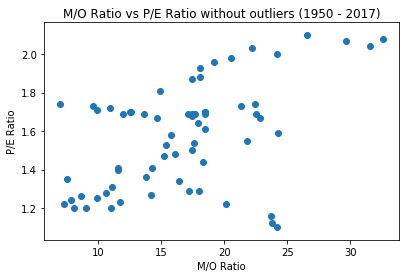

In [88]:
# Examine scatter plots for M/O vs P/E with outliers removed

plt.figure(figsize=(14,4))
plt.subplots_adjust(wspace=.2)

# Scatter Plot for M/O vs P/E Ratio 
plt.subplot(1,2,1)
plt.scatter(pe_mo_historical_no_outliers['P/E'],pe_mo_historical_no_outliers['M/O'])
plt.xlabel('M/O Ratio')
plt.ylabel('P/E Ratio')
plt.title('M/O Ratio vs P/E Ratio without outliers (1950 - 2017)')
plt.savefig('mo_pe_no_outliers.png')
plt.show()

# Redo the correlation analysis on the data set with the outliers removed
    # Analyze the correlation (Pearson coefficient) between M/O and PE with outliers removed

In [67]:
# Perform the Pearson Correlation using the scipy.stats module because this provides both r and p values

output = list(stats.pearsonr(pe_no_outliers, mo_no_outliers))

print(f'Pearson r-value is: {output[0]:.2f}')
print(f'Pearson p-value is: {output[1]:.6f}')

Pearson r-value is: 0.50
Pearson p-value is: 0.000024


# Interpretation of this Pearson Correlation is:
    # Moderate correlation based on r-value of .50 has,  as expected, improved following the removal of the 2 outliers
    # Reject the null hypothesis and conclude that the correlation between M/O and P/E is statistically significant based
        #on p-value
    # We will use this data as the basis for our model to predict the future P/E ratios from the future M/O (age) demographic

# Scale and Standardize the data
    # As pre-requesite to input the data in a machine learning model to derive the prediction, scale and standardize the data

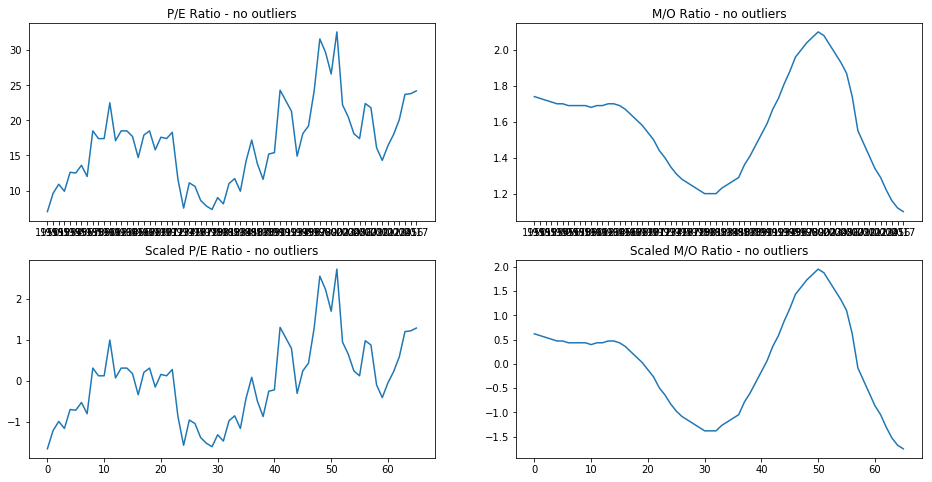

In [90]:
# Scale the data:  Scaled data has zero mean and unit variance (i.e. variance = 1)

pe_no_outliers_scale = preprocessing.scale(pe_no_outliers)
mo_no_outliers_scale = preprocessing.scale(mo_no_outliers)

# Create line plots for individual data series

plt.figure(figsize=(16,8))
plt.subplots_adjust(wspace=.2)

# Plot P/E Ratio (no outliers)
plt.subplot(2,2,1)
plt.plot(pe_no_outliers)
plt.title('P/E Ratio - no outliers')
plt.savefig('pe_r_line.png')
# Plot M/O Ratio (no outliers)
plt.subplot(2,2,2)
plt.plot(mo_no_outliers)
plt.title('M/O Ratio - no outliers')
plt.savefig('mo_r_line.png')
# Plot Scaled P/E Ratio (no outliers)
plt.subplot(2,2,3)
plt.plot(pe_no_outliers_scale)
plt.title('Scaled P/E Ratio - no outliers')
plt.savefig('scaled_pe.png')
# Plot Scaled M/O Ratio (no outliers)
plt.subplot(2,2,4)
plt.plot(mo_no_outliers_scale)
plt.title('Scaled M/O Ratio - no outliers')
plt.savefig('scaled_mo.png')
plt.show()

# Scatter plot for the scaled M/O Ratio vs the Scaled P/E Ratio

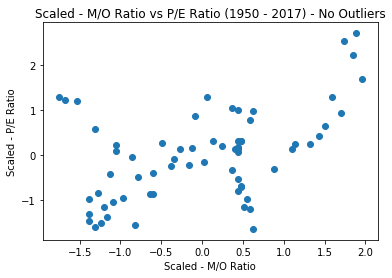

In [89]:
# Scatter Plot for Scaled M/O vs Scaled  P/E Ratio 

plt.scatter(mo_no_outliers_scale, pe_no_outliers_scale)
plt.xlabel('Scaled - M/O Ratio')
plt.ylabel('Scaled - P/E Ratio')
plt.title('Scaled - M/O Ratio vs P/E Ratio (1950 - 2017) - No Outliers')
plt.savefig('scaled_mo_pe_r.png')
plt.show()

In [70]:
# Perform the Pearson Correlation using the scipy.stats module because this provides both r and p values
    # As expected, the resulting r and p values are the same as those from the analysis pre-scaling...

output = list(stats.pearsonr(pe_no_outliers_scale, mo_no_outliers_scale))

print(f'Pearson r-value is: {output[0]:.2f}')
print(f'Pearson p-value is: {output[1]:.6f}')

Pearson r-value is: 0.50
Pearson p-value is: 0.000024


# Create the Projection Model for P/E Ratio given M/O and chart

In [71]:
# Separate the dataset into training and test data

x_train = mo_no_outliers_scale[:-10] # take all but the last 10 data points to use for training the model
y_train = pe_no_outliers_scale[:-10]

x_test = mo_no_outliers_scale[-10:] # take the first 10 data points to use for testing the model
y_test = pe_no_outliers_scale[-10:]


In [72]:
# Try Polynomial Regression to develop a model that can be used to predict (Use Scaled with no outliers)
X = x_train.reshape(-1, 1) 
y = y_train.reshape(-1, 1)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X) # X_poly contains the original X and the square of X...now fit a linear regression
X_poly[0]

array([0.61989882, 0.38427455])

In [73]:
y[0]

array([-1.66026488])

In [74]:
# Linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([-0.39122301]), array([[0.70610253, 0.18822127]]))

# Plot Prediction of P/E Ratio from M/O Ratio projections through 2060